**Exercise 6.1** Start GoL in a random state and run it until it stabilizes. What stable patterns can you identify?

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
a = np.random.randint(2, size = (10, 10), dtype = np.uint8)
print (a)

[[1 1 1 1 1 0 1 0 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 0 0 1 0 1 1 1 0 1]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 1]
 [1 1 0 1 0 1 1 1 1 1]
 [0 1 0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 1 1]]


Instead of using for loops, we will use cross-correlation via `correlated2d`. We then use the `Cell2D` module to run GoL.

In [6]:
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]])
    table = np.zeros(20, dtype = np.uint8)
    table[[3, 12, 13]] = 1
    
    def step(self):
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]


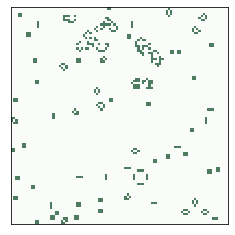

In [10]:
n = 100
life = Life(n)
life.array = np.random.randint(2, size = (n,n), dtype = np.uint8)
life.animate(1000)

Some stable patterns include the 'beehive' and blocks of live cells. Additionally, given that they do not collide, there are a number of 'blinkers' either alone or in groups.